Lesueur Philippe<br>
Lakhdar Selim<br>

# Rapport TP2 Optimisation et Apprentissage

Le but de ce TP est d'étudier le fonctionnement d'algorithmes de descente de gradient pour calculer le X qui minimise la fonction.<br>
Il s'agit de la continuité du TP précédent mais on étudiera le fonctionnement de la descente de gradient en faisant varier le parmètre $\alpha$. <br>
Ce paramètre va influer sur le comportement des fonctions et sur la norme du gradient.

## Sommaire : 
*->* Etude des fonctions et de leur gradients<br>
*->* Recherches sur l'algorithme Gradient descent avec un step size constant<br>
*->* Recherches sur l'algorithme Gradient descent avec un step size suivant l'Armijo rule<br>
*->* Recherches sur l'algorithme Gradient descent avec direction Newtonienne<br>
*->* Comparaison avec différents algorithmes de scipy.optimize.

### Fonction n°1

$f_1^\alpha(X) = \sum_{i=1}^{n} \alpha.x_i^2$ <br><br>
Il s'agit de la même fonction que la fonction n°1 de l'atelier 1 à un facteur $\alpha$ près. <br>
On a, par conséquent, $\sum_{i=1}^{n} x_{i}^{2} = 0$ lorsque $x_{i} = 0$ pour tous les $x_i$.<br><br>
Cependant, il faut faire attention à $\alpha = 0$ qui produit également $f_1^{\alpha=0}(X) = 0$ pour n'importe quel $X$. <br>
Un autre changement majeur à la fonction est que la présence du $\alpha$ permet les valeurs négatives, <br>
on ne pourra donc pas utiliser de valeurs négatives pour $\alpha$ lors de la recherche sur cette fonction.

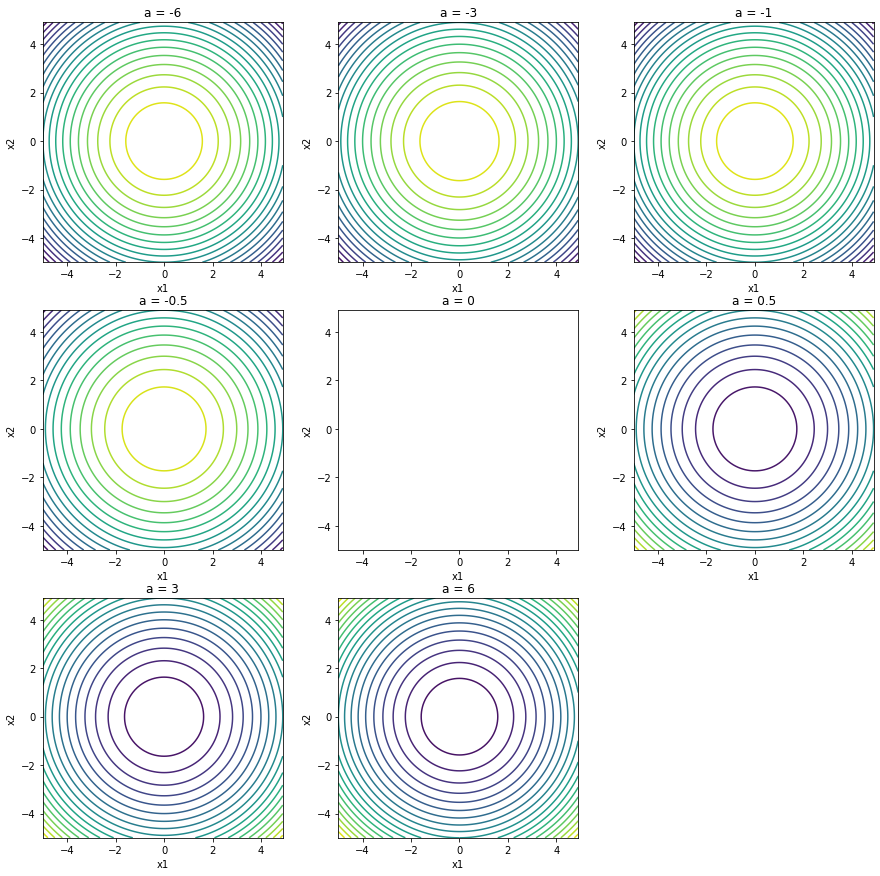

##### Gradients :

$\nabla f_1^{\alpha} (X) = \begin{bmatrix} \frac {\delta f_1^{\alpha}} {\delta x_1} (X) \\ \vdots \\ \frac {\delta f_1^{\alpha}} {\delta x_n} (X) \end{bmatrix} = \begin{bmatrix} 2\alpha x_1 \\ \vdots \\ 2\alpha x_n \end{bmatrix}$

$\nabla^2 f_1^{\alpha} (X) = \begin{bmatrix} (2\alpha x_1)' \\ \vdots \\ (2\alpha x_n)' \end{bmatrix} =  \begin{bmatrix} 2\alpha \\ \vdots \\ 2\alpha \end{bmatrix}$

### Fonction n°2

$f_2^{\alpha}(X) = \sum_{i=1}^{n} 10^{\alpha \frac {i-1} {n-1}}.x_i^2$ <br><br>
Il s'agit de la même fonction que la fonction n°2 de l'atelier 1 sauf au niveau de son facteur. <br>
$100^{\frac {i-1}{n-1}}$ devient $10^{\alpha.\frac {i-1}{n-1}}$.<br><br>
Selon sa taille est son signe, $\alpha$ va venir modifier la pondération des $x_i$. <br>
Un grand $\lvert\alpha\rvert$ va accentuer la pondération des $x_i$ et inversement. <br>
Un $\alpha = 0$ va réduire l'exposant à 0, ce qui va revenir à avoir $\sum_{i=1}^{n} x_i^2$. <br><br>
Le signe de alpha va définir si on pondère les $x_i$ de façon croissante ou décroissante. <br>
Un $\alpha$ négatif va donner $ \sum_{i=1}^{n} \frac {1} {10^{|\alpha| \frac {i-1} {n-1}}}.x_i^2$ et donc une pondération décroissante.

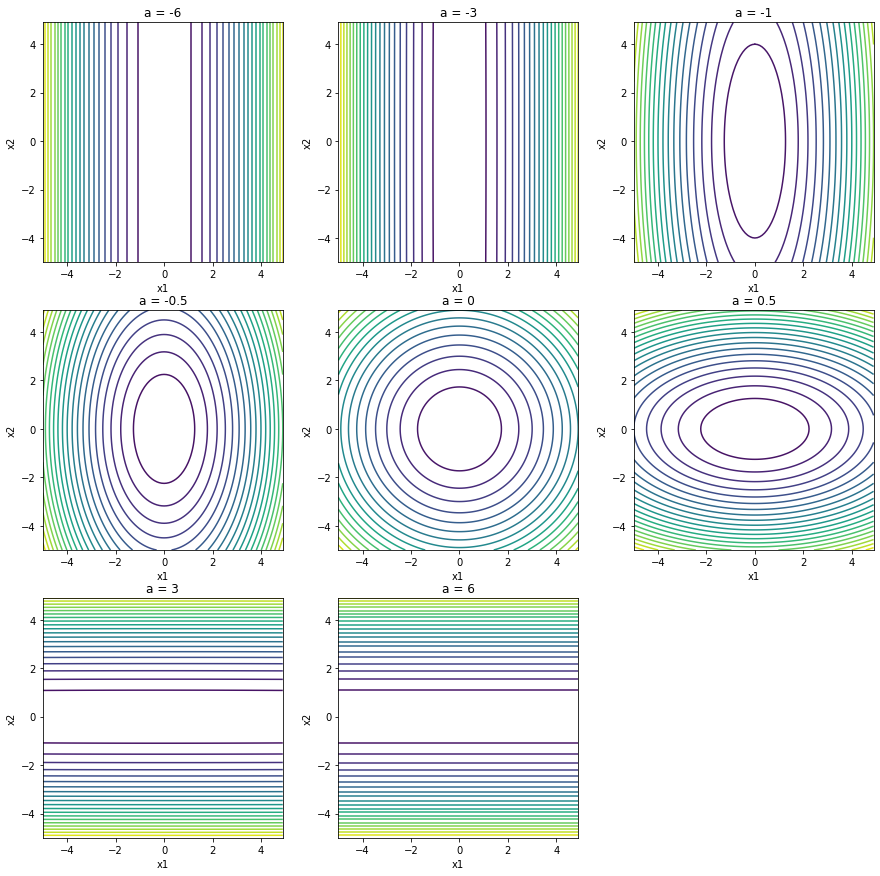

##### Gradient :

$\nabla f_2^{\alpha} (X) = \begin{bmatrix} \frac {\delta f_2^{\alpha}} {\delta x_1} (X) \\ \vdots \\ \frac {\delta f_2^{\alpha}} {\delta x_n} (X) \end{bmatrix} = \begin{bmatrix} 10^{\alpha. \frac {1-1} {n-1}} x_1 \\ \vdots \\ 10^{\alpha. \frac {n-1} {n-1}} x_n \end{bmatrix}$

$\nabla^2 f_2^{\alpha} (X) =\begin{bmatrix} (10^{\alpha. \frac {1-1} {n-1}} x_1)' \\ \vdots \\ (10^{\alpha. \frac {n-1} {n-1}} x_n)' \end{bmatrix} = \begin{bmatrix} 10^{\alpha. \frac {1-1} {n-1}} \\ \vdots \\ 10^{\alpha. \frac {n-1} {n-1}} \end{bmatrix} $

### Fonction n°3

$f_3^{\alpha}(X) = 10.n + \sum_{i=1}^{n} (10^{\alpha \frac {i-1} {n-1}}.(x_i - 1)^2 - 10.\cos(2\pi(x_i - 1)))$<br><br>
Cette fonction est dans le même esprit que la fonction 3 de l'atelier 1 mais l'objectif diffère. <br>
Ici, pour $10^{\alpha \frac {i-1} {n-1}}.(x_i - 1)^2$, on obtient 0 pour $x_i = 1$. <br>
Et il en va de même pour $10.\cos(2\pi(x_i - 1))$, on obtient 1 pour $x_i = 1$ <br>
On a donc bien $10.n + \sum_{i=1}^{n} (10^{\alpha \frac {i-1} {n-1}}.(x_i - 1)^2 - 10.\cos(2\pi(x_i - 1))) = 0$ avec $x_i = 1$ pour tous les $x_i$.<br> <br>
Dans cette fonction, $\alpha$ va avoir le même effet que pour la fonction précédente pour la première partie.<br>
On a cependant vu que dans les négatifs la pondération décroissante se fait en réduisant l'importance des $x_i$ alors que dans les positifs on l'augmente. <br>
Diminuer $\alpha$ aura donc pour effet de donner plus d'importance à la seconde partie : $10.\cos(2\pi(x_i - 1))$<br>
Et à l'inverse, l'augmenter revient à rendre cette seconde partie négligeable.

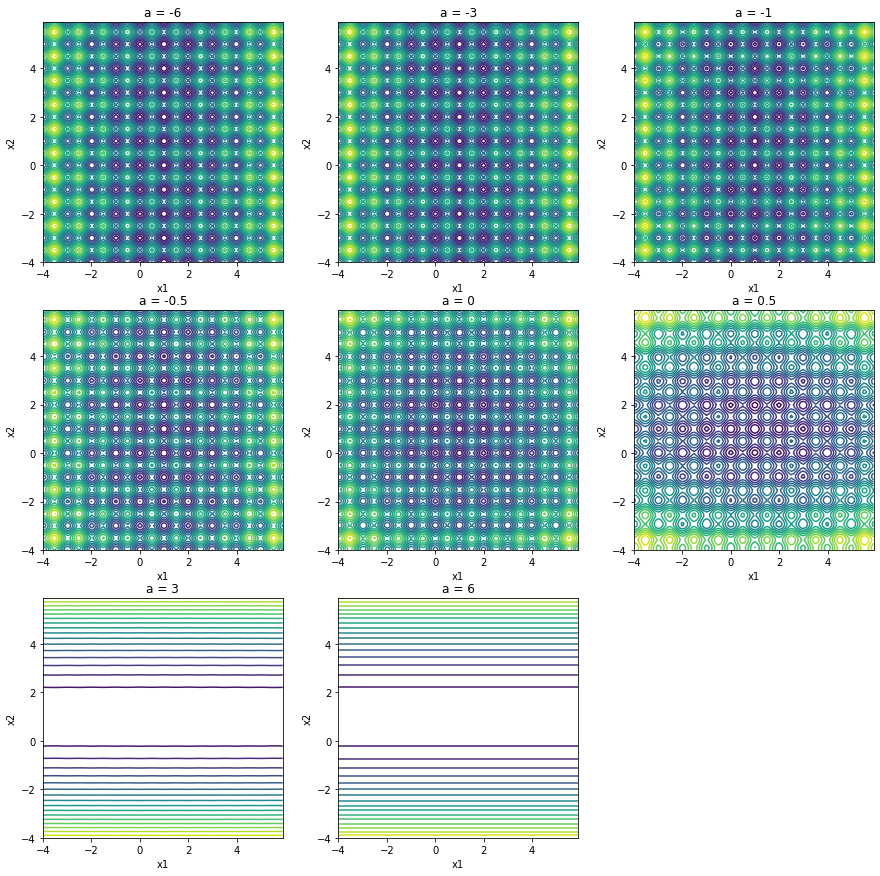

##### Gradient :

$\nabla f_3^{\alpha} (X) =\begin{bmatrix} \frac {\delta f_3^{\alpha}} {\delta x_1} (X) \\ \vdots \\ \frac {\delta f_3^{\alpha}} {\delta x_n} (X) \end{bmatrix} =  \begin{bmatrix} 2.10^{\alpha. \frac {1-1} {n-1}} (x_1-1) + 2.10.\pi\sin(2\pi(x_1 - 1)) \\ \vdots \\ 2.10^{\alpha. \frac {n-1} {n-1}} (x_n-1) + 2.10.\pi\sin(2\pi(x_n - 1)) \end{bmatrix}$

$\nabla^2 f_3^{\alpha} (X) =\begin{bmatrix} (2.10^{\alpha. \frac {1-1} {n-1}} (x_1-1) + 2.10.\pi\sin(2\pi(x_1 - 1)))' \\ \vdots \\ (2.10^{\alpha. \frac {n-1} {n-1}} (x_n-1) + 2.10.\pi\sin(2\pi(x_n - 1)))' \end{bmatrix} = \begin{bmatrix} 2.10^{\alpha. \frac {1-1} {n-1}} + 4.10.\pi^2\cos(2\pi(x_1 - 1)) \\ \vdots \\ 2.10^{\alpha. \frac {n-1} {n-1}} + 4.10.\pi^2\cos(2\pi(x_n - 1)) \end{bmatrix}$

### Fonction n°4

$f_4^{\alpha}(X) = \sum_{i=1}^{n} (10^{\alpha}.((x_i - 1)^2 - (x_{i+1} - 1))^2 + (x_i - 2)^2)$<br><br>
Comme pour $f_3^{\alpha}$, cette fonction a le même esprit que sont homologue de l'atelier 1 mais l'objectif diffère.<br>
Les deux parties sont au carré donc il faut chercher quand elles s'annulent. <br>
$(x_i - 2)^2 = 0$ pour $x_i = 2$   et   $((x_i - 1)^2 - (x_{i+1} - 1))^2 = 0$ pour $x_i=x_{i+1} = 2$<br><br>
Il n'y a, cette fois-ci, pas de pondération néanmois, $\alpha$ va définir l'importance de $10^{\alpha}.((x_i - 1)^2 - (x_{i+1} - 1))^2$ par raport à $(x_i - 2)^2$.

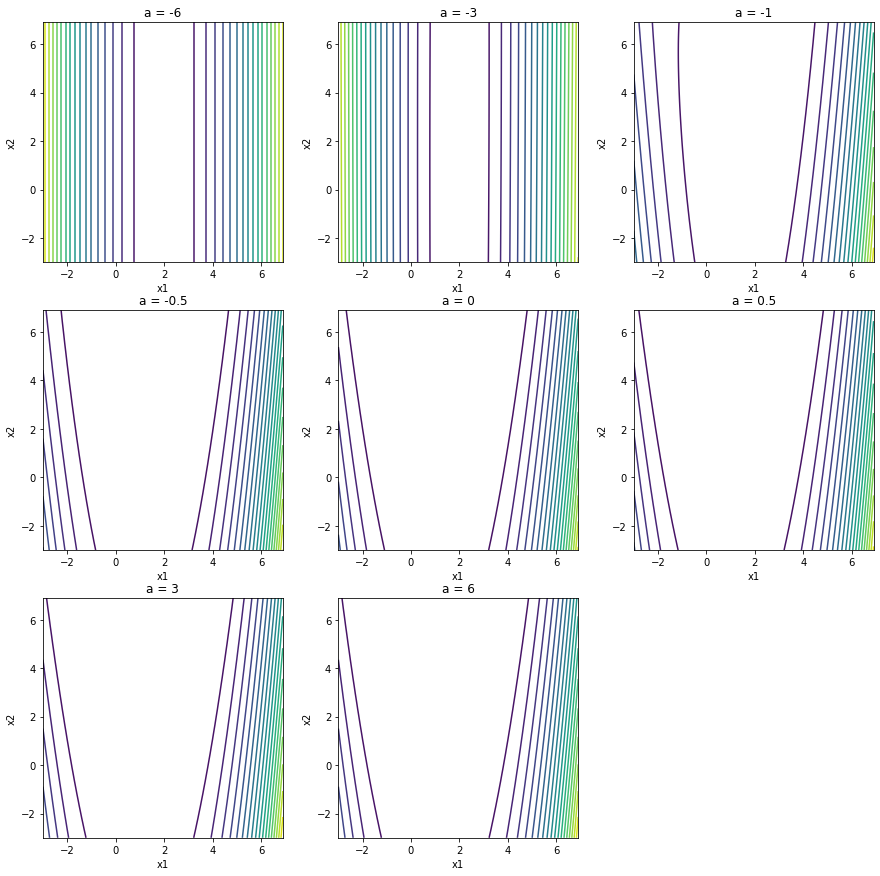

##### Gradient :

$\nabla f_4^{\alpha} (X) =\begin{bmatrix} \frac {\delta f_4^{\alpha}} {\delta x_1} (X) \\ \vdots \\ \frac {\delta f_4^{\alpha}} {\delta x_n} (X) \end{bmatrix} = \begin{bmatrix}4.10^a.(x_1 - 1).((x_1 - 1)^2 - (x_{2} - 1)) + 2(x_1 - 2) \\ 4.10^a.(x_{2} - 1).((x_{2} - 1)^2 - (x_{3} - 1)) + 2(x_{2} - 2) - 2.10^a.((x_{1} - 1)^2 - (x_{2} -1)) \\ \vdots \\ 4.10^a.(x_{n-1} - 1).((x_{n-1} - 1)^2 - (x_{n} - 1)) + 2(x_{n-1} - 2) - 2.10^a.((x_{n-2} - 1)^2 - (x_{n-1} -1))\\- 2.10^a.((x_{n-1} - 1)^2 - (x_{n} -1)) \end{bmatrix}$

$\nabla^2 f_4^{\alpha} (X) =\begin{bmatrix}4.10^a.((3(x_1 - 1)^2 - (x_{2} - 1)) + 2\\ 4.10^a.((3(x_2 - 1)^2 - (x_{3} - 1)) + 2 + 2.10^a \\ \vdots \\ 4.10^a.((3(x_{n-1} - 1)^2 - (x_{n} - 1)) + 2 + 2.10^a\\ 2.10^a \end{bmatrix}$

### Descente de gradient en step size constant

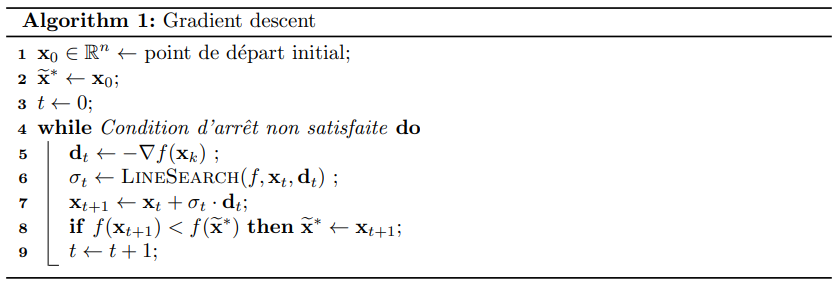

Cette algorithme applique simplement la descente de gradient avec un step size $\sigma$ constant.<br>
Ici, on a donc $\sigma_{t+1} = \sigma_t$

On a $x_{t+1} = x_t + \sigma.d_t$ : <br>
Soit $x_{t+1} =\begin{bmatrix} x_{t1} \\ \vdots \\ x_{tn} \end{bmatrix} - \sigma.\begin{bmatrix} \frac {\delta f^{\alpha}} {\delta x_1} (X) \\ \vdots \\ \frac {\delta f^{\alpha}} {\delta x_n} (X) \end{bmatrix} = \begin{bmatrix} x_{t1} - \sigma.\frac {\delta f^{\alpha}} {\delta x_1} (X)\\ \vdots \\ x_{tn} - \sigma.\frac {\delta f^{\alpha}} {\delta x_n} (X)\end{bmatrix}$

On étudie les résultats de cet algorithme sur la fonction $f_1^\alpha$.

1) Pour n = 2, α = 1/2 et σ = 0.1 visualiser les xt dans le plan avec deux points de départs (−5, 10) et (10, 10).<br>

$X = [-5,10]$
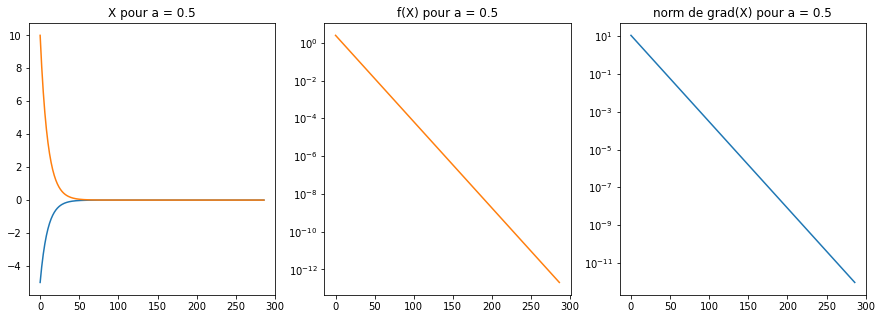

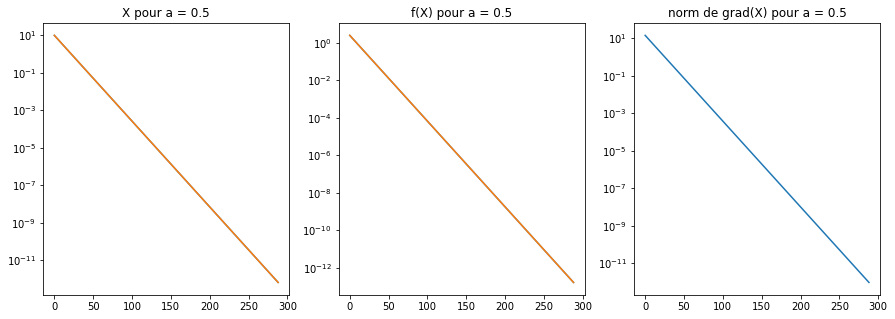

Voici la descente de gradient: <br>
$ X = [-5,10]$ (286 itérations) et $X = [10,10]$ (288 itérations)<br> 
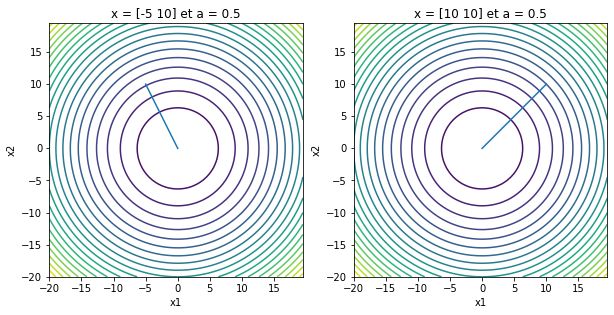

On constate qu'il s'agit d'une droite qui va du point de départ jusqu'au point (0,0) qui minimise $f_1^\alpha(X)$. <br>
Cette forme est due au caractère circulaire de $f_1^\alpha(X)$, en chaque point le gradient pointe vers le centre.

2) Pour n = 10, σ = 0.1, et α ∈ {1/2, 1/20, 1/200}, donner le nombre d’itérations pour avoir || ∇f(xt) || ≤ 10−12 en partant de x0 = (10, 10, . . . , 10). Même chose pour σ = 0.01.

Pour $\sigma$ = 0.1 : <br>
Nb itérations : 296 pour $\alpha$ = 0.5<br>
Nb itérations : 2864 pour $\alpha$ = 0.05<br>
Nb itérations : 26467 pour $\alpha$ = 0.005<br>

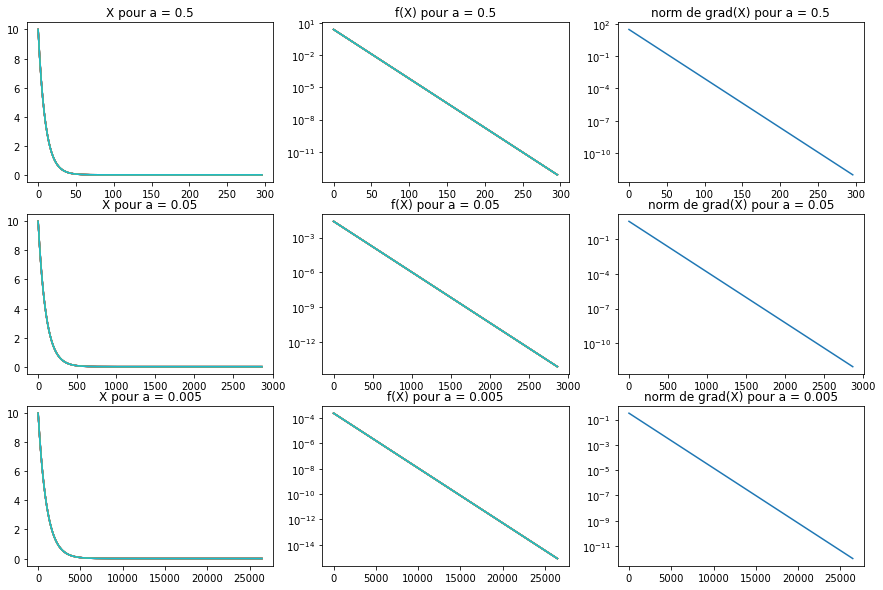

Pour $\sigma$ = 0.01 : <br>
Nb itérations : 3093 pour $\alpha$ = 0.5 <br>
Nb itérations : 28768 pour $\alpha$ = 0.05 <br>
Nb itérations : 264785 pour $\alpha$ = 0.005 <br>

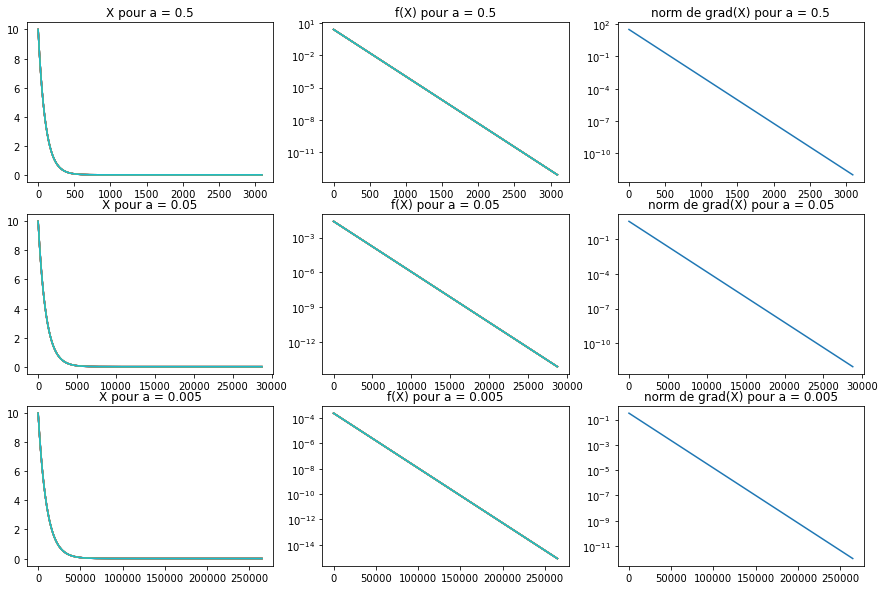

On obtient ces changements de nombre d'itération car même si, pour $f_i^\alpha$, le $\alpha$ ne change pas la forme de la fonction,<br> il va simplement contribuer au pas du gradient au même titre que $\sigma$. <br>On aura pour chaque $x_{(t+1)i}$ : $x_{(t+1)i} = x_{ti} - 2\alpha x_{ti}\sigma$<br>
Comme on divise par 10 à chaque fois, on se retrouve avec environ 10 fois plus d'itérations. <br>Seulement environ car $\alpha$ va aussi modifier la distance à l'optimale du point de départ.

### Descente de gradient en step size suivant l'Armijo rule

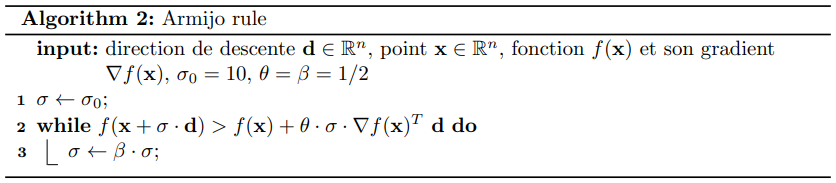

C'est un algorithme qui vient diviser sigma par 2 tand le prochain point de la descente ne minimise pas la fonction $f^\alpha(x_{t+1})$ par rapport à $f^\alpha(x_t) - \epsilon$.

On part donc d'un $\sigma$ et d'un $\beta$ fixes. On va donc revisiter les mêmes $\sigma$ à chaque itération de la descente de gradient.<br>

Dans le contexte de notre descente de gradient, on va simplement changer $\sigma_{t+1} = \sigma_t$ en $\sigma_{t+1} = armijo(f^\alpha, x_t, \nabla f^\alpha, \sigma, \beta, dt, \theta)$ avec $dt = -\nabla f^\alpha(x_t)$

Il y a un point important à soulever concernant ces algorithmes qui diffère grandement des algos du TP précédent : ils n'utilisent pas d'aléatoire. <br> Peu importe le nombre de fois où on va faire tourner ces algos, si les paramètres restent les mêmes, les résultats ne changeront pas.

#### Etude sur la fonction n°1 :

Pour $\sigma$ = 10 : <br>
Nb itérations : 32 pour $\alpha$ = 0.5 <br>
Nb itérations : 1 pour $\alpha$ = 0.05 <br>
Nb itérations : 252 pour $\alpha$ = 0.005 <br>

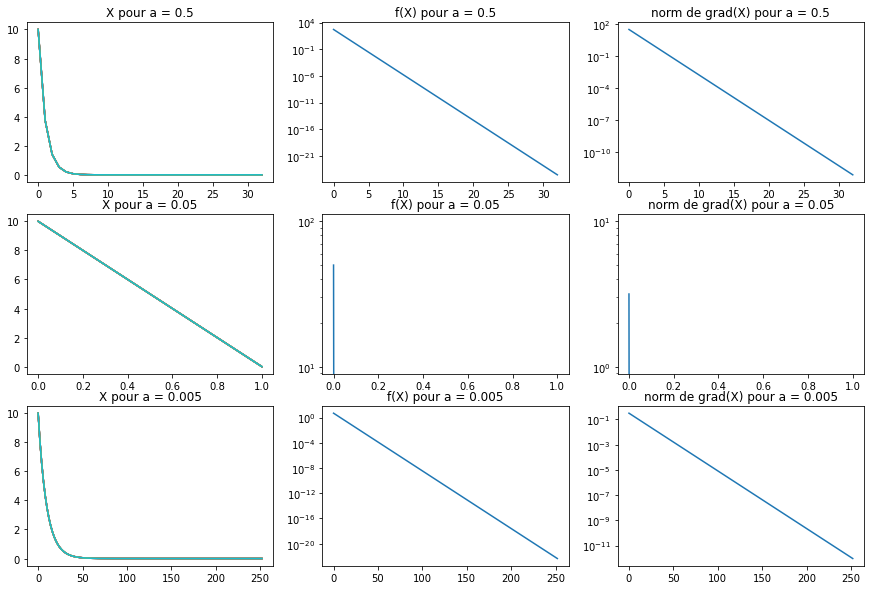

Ici, on obtient un résultat beaucoup plus rapidement car le $\sigma$ est choisis en faisant une recherche sur des $\sigma$ décroissants.<br>
On divise $\sigma$ par 2 tand qu'on a pas une solution suffisamment améliorante.<br>
Le $\sigma_{optimal}$ pour remplir la condition de l'armijo va donc se trouver entre $\sigma$ et $2\sigma$.

Il est donc possible de trouver un meilleur $\sigma$ mais $\sigma_0$ ne doit pas être retrouvable par $\sigma_{0_{new}} = \beta^k.\sigma_{0_{old}}$.

Pour $\sigma$ = 8 : <br>
Nb itérations : 1 pour $\alpha$ = 0.5 <br>
Nb itérations : 18 pour $\alpha$ = 0.05 <br>
Nb itérations : 318 pour $\alpha$ = 0.005 <br>

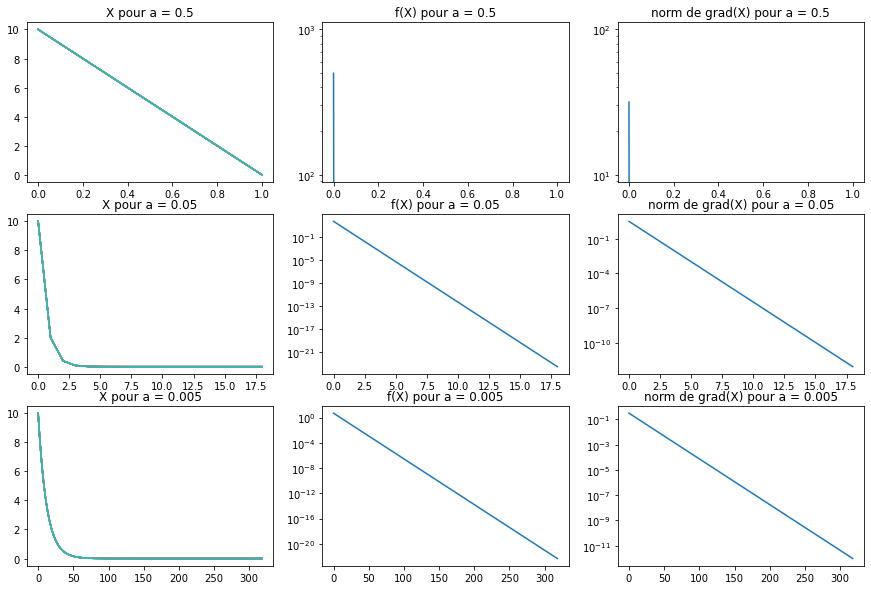

On voit, ici contrairement à $\sigma = 10$, que c'est $\alpha = 0.5$ le plus rapide au lieu de $\alpha = 0.05$.<br>
Cela montre bien que $\alpha$ va modifier la fonction comme son gradient. <br>
On ne peut donc pas déduire un $\sigma$ de départ qui serait le meilleur pour n'importe quelle valeur de $\alpha$.

#### Etude sur la fonction n°2 :

1) Pour $f^α_2$, vous pouvez experimenter avec α ∈ {1, 2, 3} et x0 = (10, 10, ... , 10) et refaire les mêmes observations que précédemment. 

Pour $\sigma$ = 10 : <br>
Nb itérations : 130 pour $\alpha$ = 1 <br>
Nb itérations : 254 pour $\alpha$ = 2 <br>
Nb itérations : 7157 pour $\alpha$ = 3 <br>

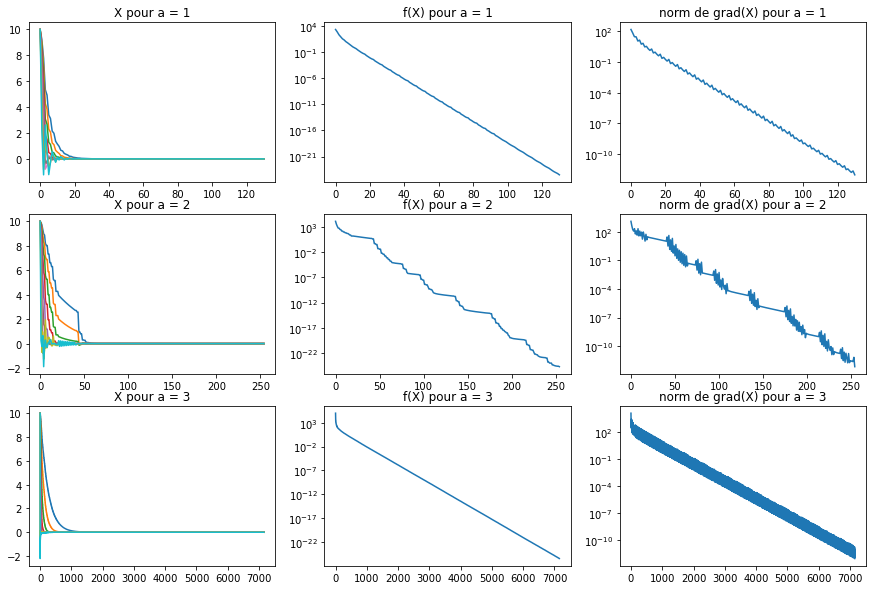

Si on fait la même chose sur un X de dimension 2 :

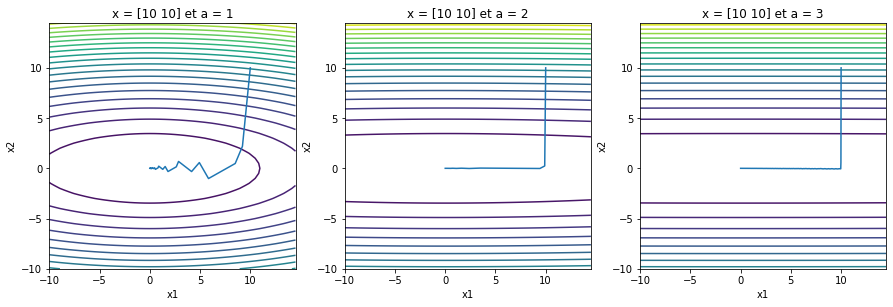

On observe que selon $\alpha$ les besoins de la recherche ne vont pas être les mêmes. <br>

Pour $\sigma$ = 28 : <br>
Nb itérations : 73 pour $\alpha$ = 1 <br>
Nb itérations : 1184 pour $\alpha$ = 2 <br>
Nb itérations : 5653 pour $\alpha$ = 3 <br>

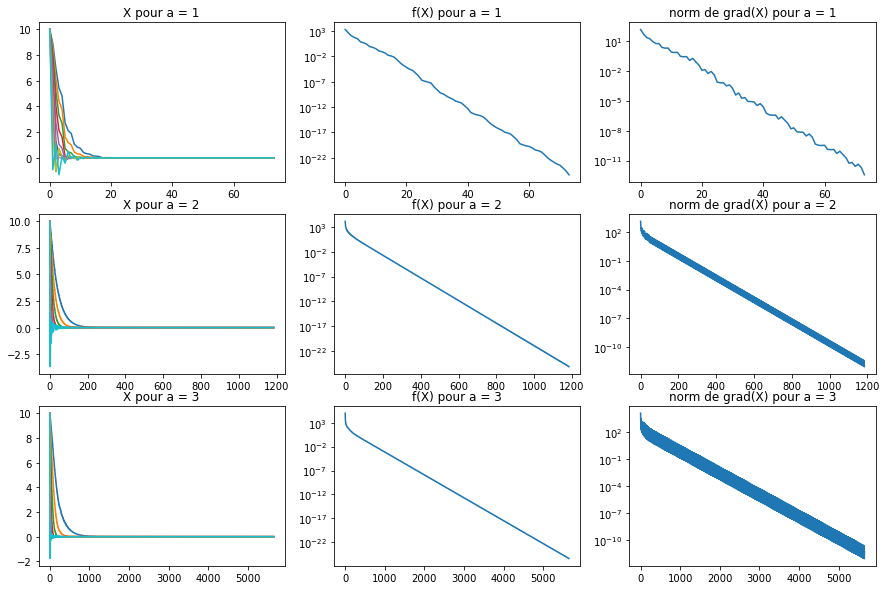

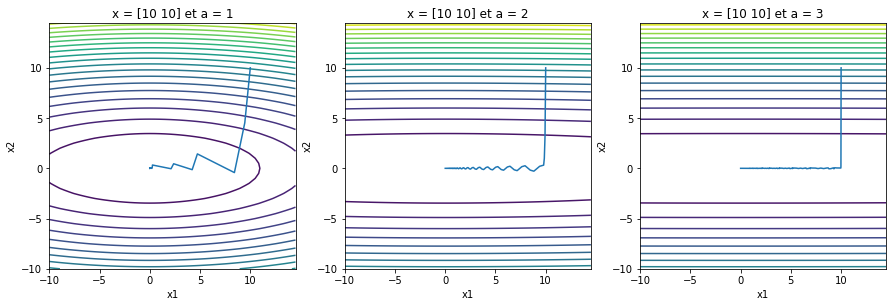

Il n'y a à priori aucun moyen de dire quel $\sigma$ aura un meilleur résultat pour un $\alpha$ donné.<br>
Et on peut voir sur les courbes de la norme du gradient que le plus grand step size $\sigma$ améliorant n'est pas forcément la meilleure solution. <br>
En effet, on voit sur cette représentation 2-D que le déplacement de fait en zig zag sur la fin car $x_2$, notamment grâce à $\alpha$, va avoir une importance plus grande que $x_1$.<br>
A partir d'un certain moment, un step size plus petit permettrait de moins se déplacer sur $x_2$ et pouvoir changer plus fortement la direction du gradient pour pouvoir, ensuite augmenter le step size de façon significative et ainsi gagner des itérations. <br>

2) Pour $f^α_3$ et pour $f^α_4$, vous pouvez étudier l'efficacité des variantes pour trouver l'optimum.

$f_3^\alpha$ : 

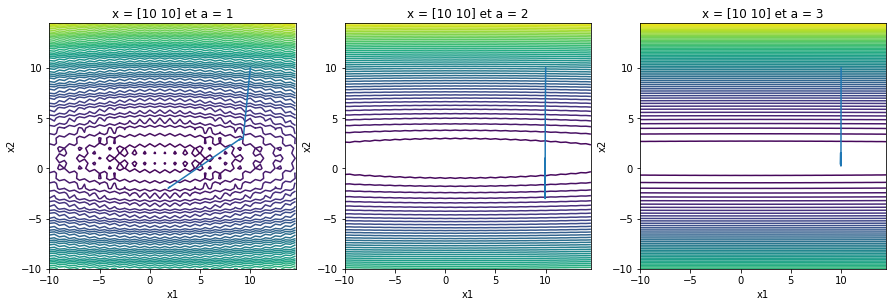

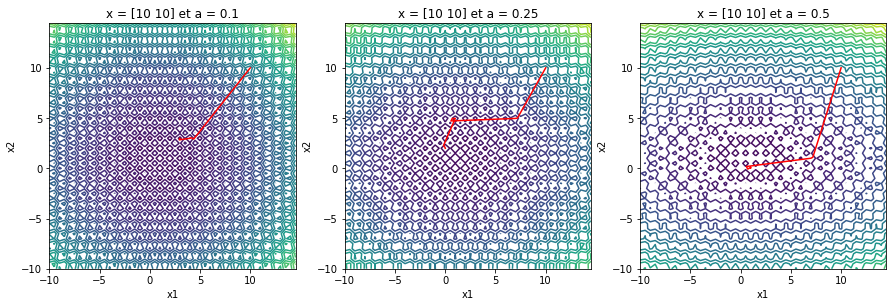

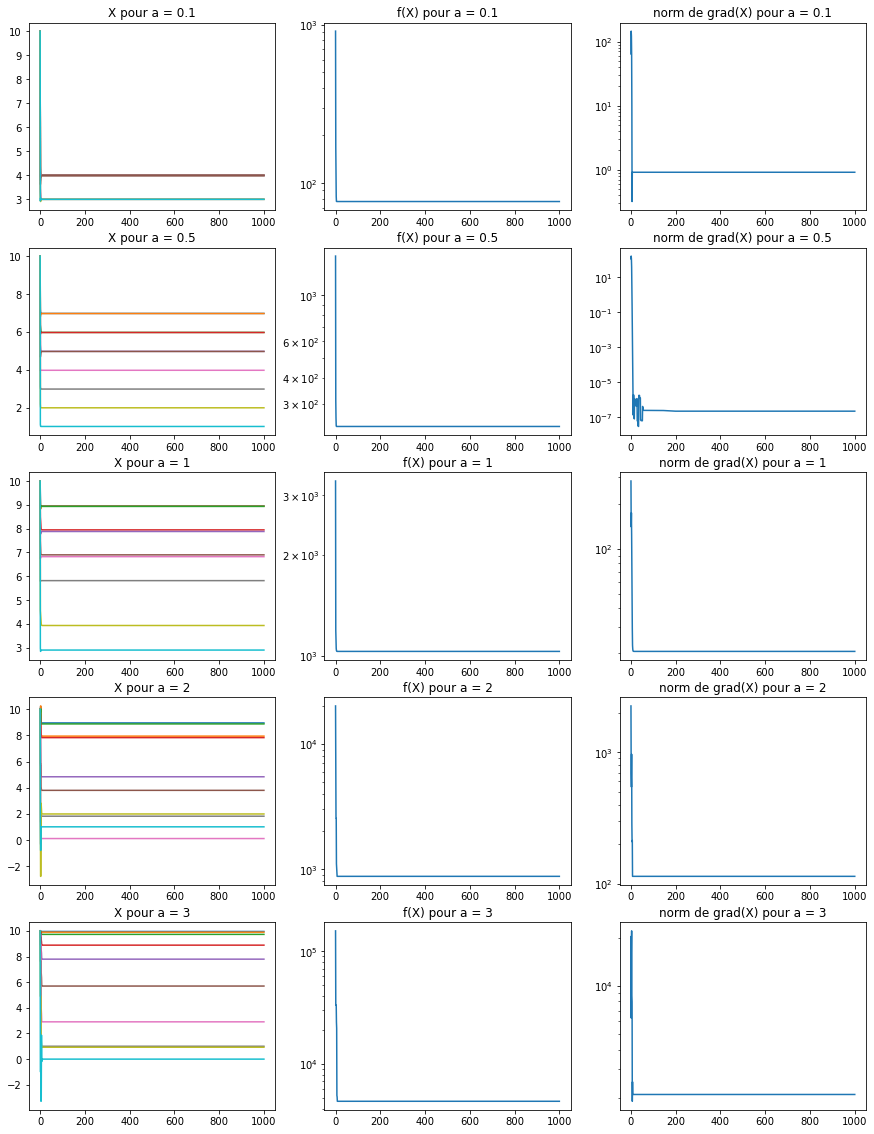

$\nabla f_3^{\alpha} (X) = \begin{bmatrix} \frac {\delta f_3^{\alpha}} {\delta x_1} (X) \\ \vdots \\ \frac {\delta f_3^{\alpha}} {\delta x_n} (X) \end{bmatrix} = \begin{bmatrix} 2.10^{\alpha. \frac {1-1} {n-1}} (x_1-1) + 2.10.\pi\sin(2\pi(x_1 - 1)) \\ \vdots \\ 2.10^{\alpha. \frac {n-1} {n-1}} (x_n-1) + 2.10.\pi\sin(2\pi(x_n - 1)) \end{bmatrix}$

Le problème que l'on peut identifier, ici, c'est que la descente de gradient est rendue aléatoire par la partie sinusoïde qui, ne serait-ce que pour $x_1$ va générer des directions qui peuvent être à l'opposée de l'optimum. <br> 
Pour cette fonction et cette algorithme, il n'y a aucun moyen efficace de trouver les bons paramètres de la recherche.

$f_4^\alpha$ : 

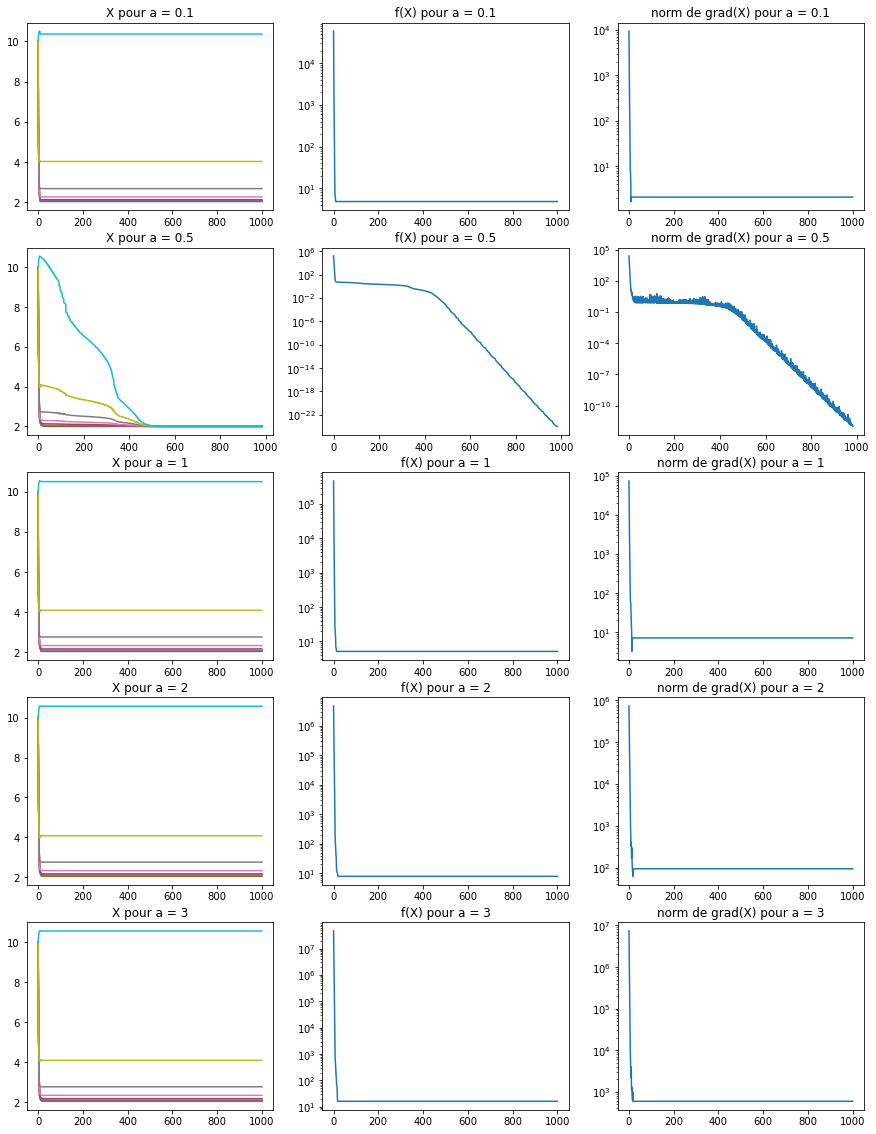

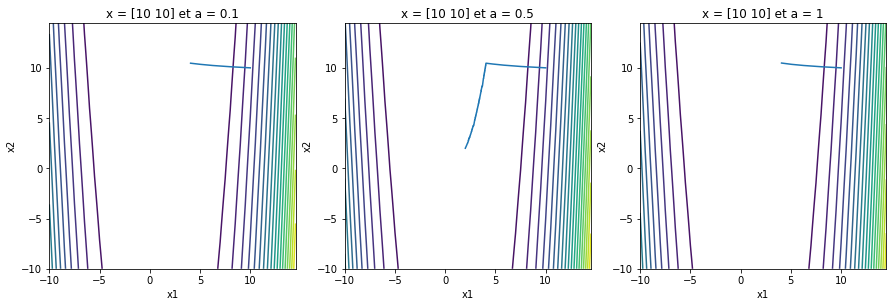

$$f_4^{\alpha}(X) = \sum_{i=1}^{n} (10^{\alpha}.((x_i - 1)^2 - (x_{i+1} - 1))^2 + (x_i - 2)^2)$$

$\nabla f_4^{\alpha} (X) =\begin{bmatrix} \frac {\delta f_4^{\alpha}} {\delta x_1} (X) \\ \vdots \\ \frac {\delta f_4^{\alpha}} {\delta x_n} (X) \end{bmatrix} = \begin{bmatrix}4.10^a.(x_1 - 1).((x_1 - 1)^2 - (x_{2} - 1)) + 2(x_1 - 2) \\ 4.10^a.(x_{2} - 1).((x_{2} - 1)^2 - (x_{3} - 1)) + 2(x_{2} - 2) - 2.10^a.((x_{1} - 1)^2 - (x_{2} -1)) \\ \vdots \\ 4.10^a.(x_{n-1} - 1).((x_{n-1} - 1)^2 - (x_{n} - 1)) + 2(x_{n-1} - 2) - 2.10^a.((x_{n-2} - 1)^2 - (x_{n-1} -1))\\- 2.10^a.((x_{n-1} - 1)^2 - (x_{n} -1)) \end{bmatrix}$

Nous n'avons pas trouvé d'explication mathématique mais il semble que $\alpha = 0.5$ et $\sigma = 10$ permette d'atteindre une zone particulière de $f_4^\alpha$ qui offre une opportunité au gradient d'être mis dans la bonne direction.<br>

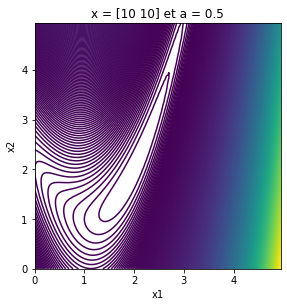

Ces paramètre doivent permttre d'atteindre cette zone en un sommet et ensuite de descendre de sommet en sommet.

##### Comparaison avec les fonctions de l'atelier 1:

On commence par l'algorithme (1 + 1)-ES avec step size adaptatif sur $f_2^\alpha$.<br>
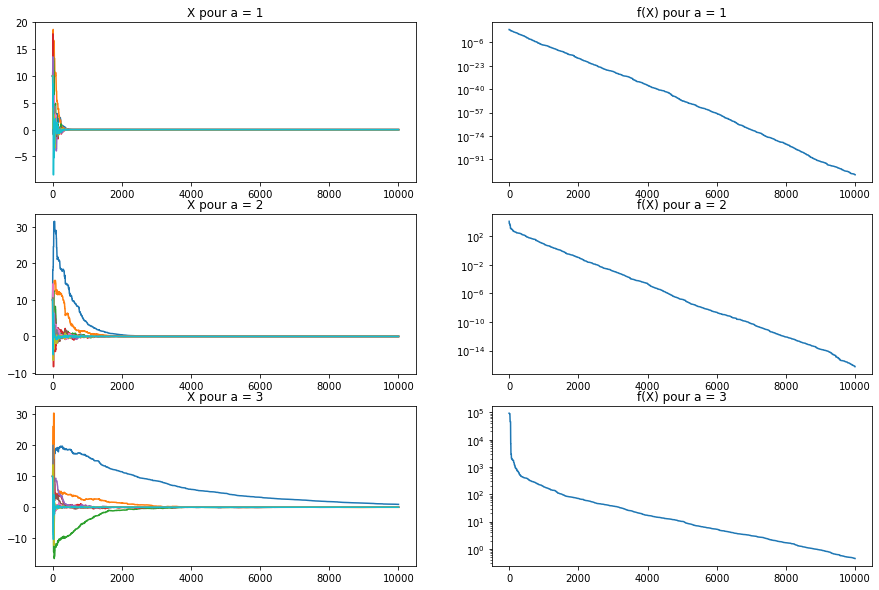

Si on revient sur les courbe de l'algorithme avec armijo rule, on s'apperçoit qu'on converge beaucoup plus rapidement. <br>
Cependant, une itération prend beacoup moins de temps en (1+1)-ES qu'en descente de gradient car il y a moins à calculer. <br>
On va voir si $f_3^\alpha$ conforme la tendance.

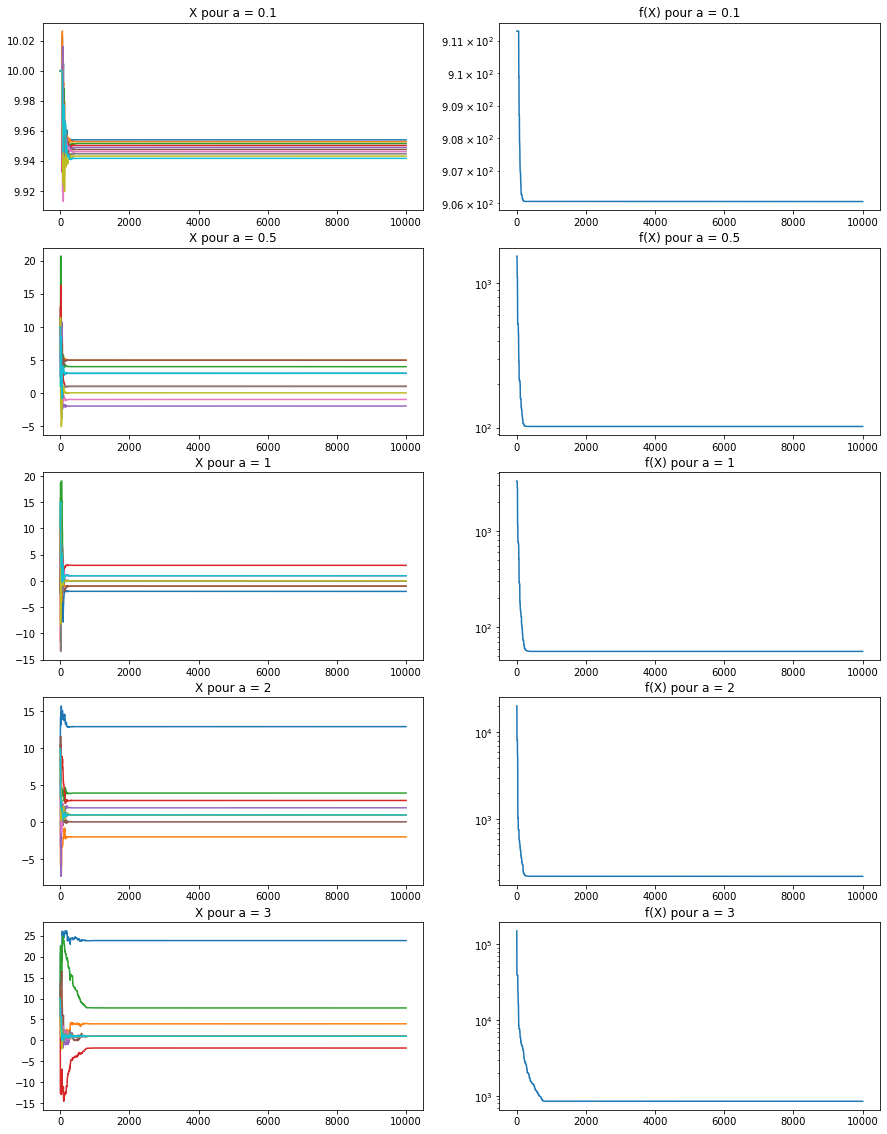

Ici, le nombre d'itérations importe peu car on se retrouve vite bloqué. Il faut donc chercher à savoir lequel donne le meilleur résultat. <br> Il semblerait que (1 + 1)-ES fournisse des résultats légèrement meilleurs.

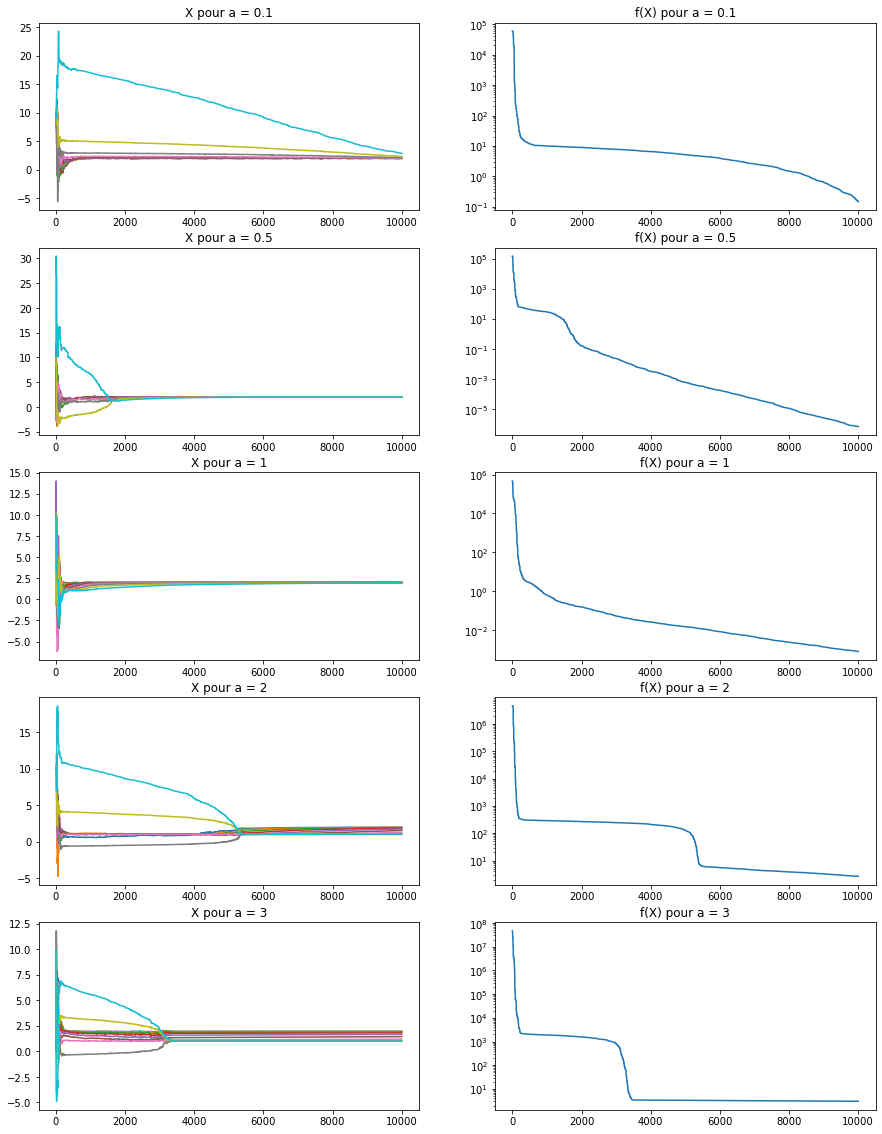

Pour $f_4^\alpha$, on remarque que la convergence est beacoup plus lente en $\alpha = 0.5$ mais la plage de $\alphas$ utilisables s'agrandie car $\alpha = 0.1$ et $\alpha = 1$ ne sont pas bloqués contrairement à la descente de gradient.

Pour les 3 fonctions, ($\mu/\mu;\lambda$)-ES n'est pas très efficace sur $\alpha = 1$. Mais à cause de l'implémentation de cet algorithme, on ne peut pas faire varier $\alpha$. <br>
Ce n'est cependant pas très grave car CMA-ES est une version optimisé de cet algorithme. On pourra donc ne l'étudier que lui.

Sur $f_3\alpha$, CMA-ES n'est pas plus efficace que la descente ou (1+1)-ES<br>

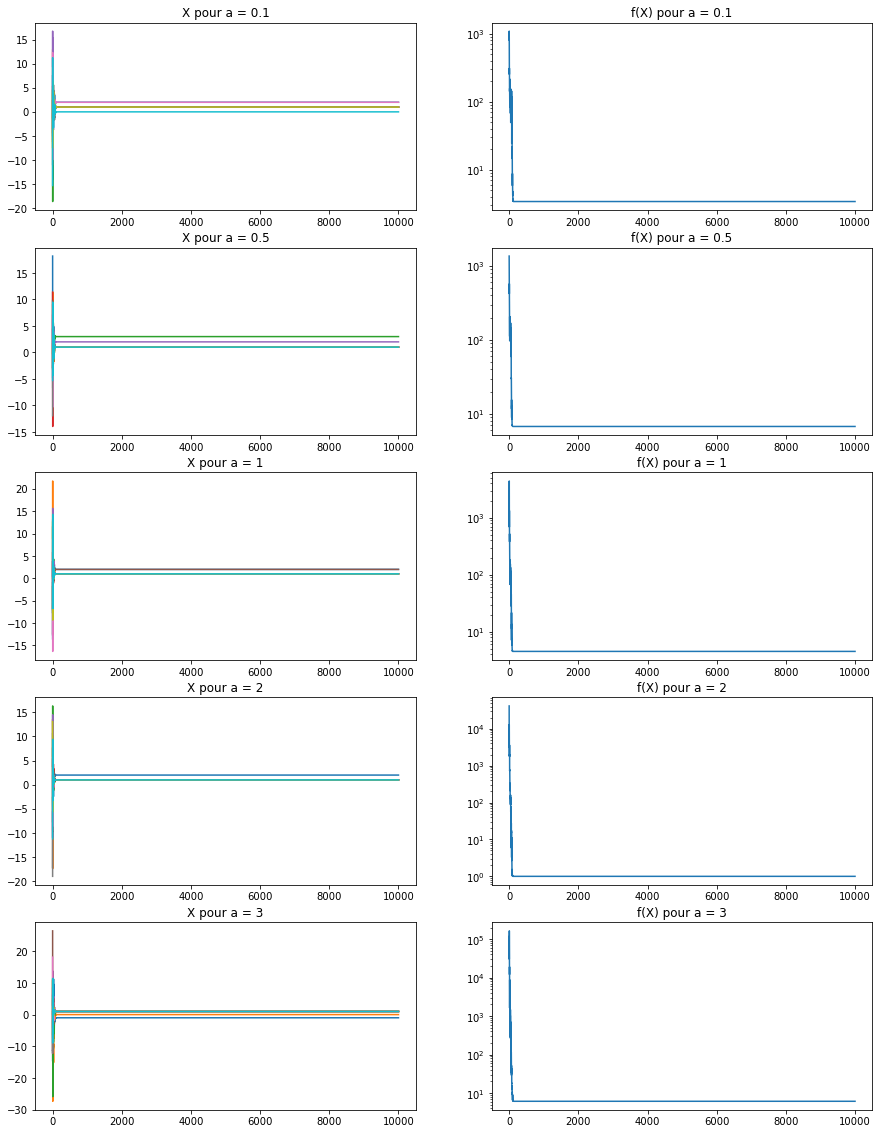

Cependant, CMA-ES est plus efficace sur $f_2^\alpha$ et est beaucoup plus efficace sur $f_4^\alpha$, avec de biens meilleurs résultats sur tous les $\alpha$ :<br>

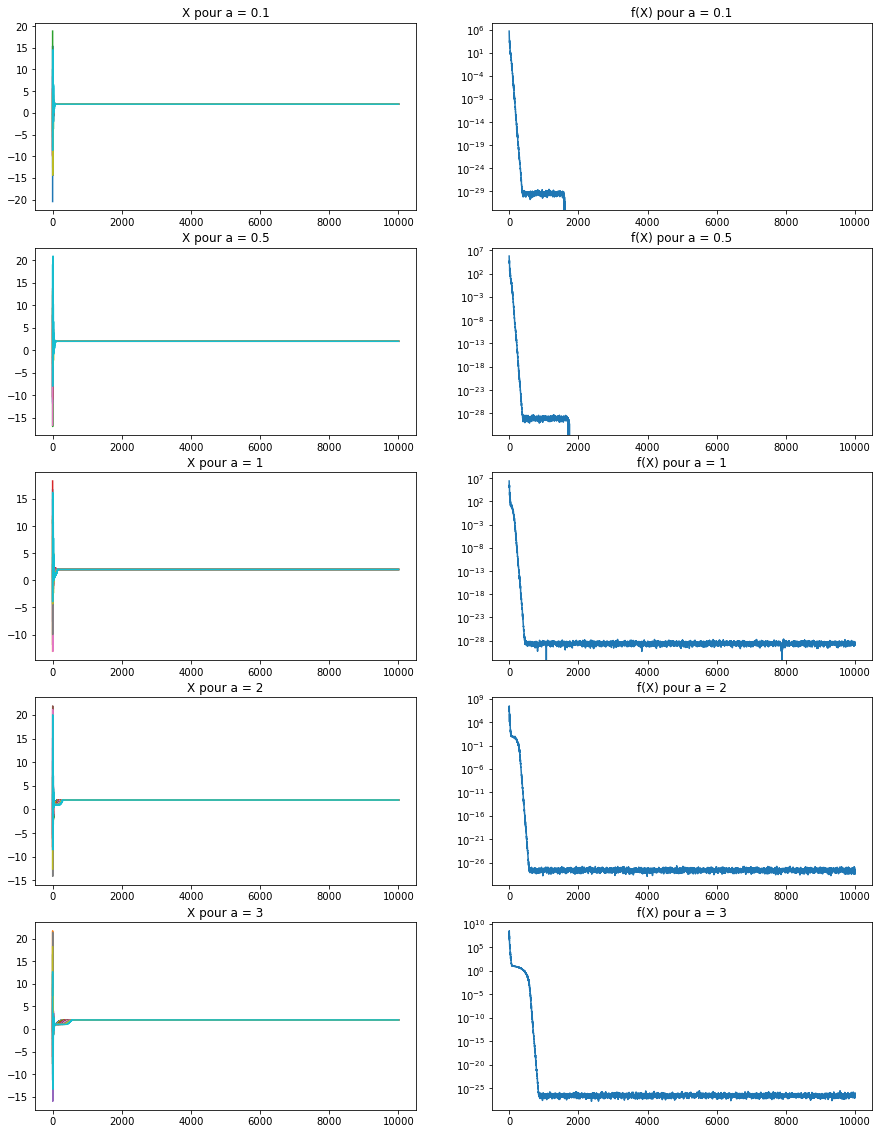

$f_2^\alpha$ : 

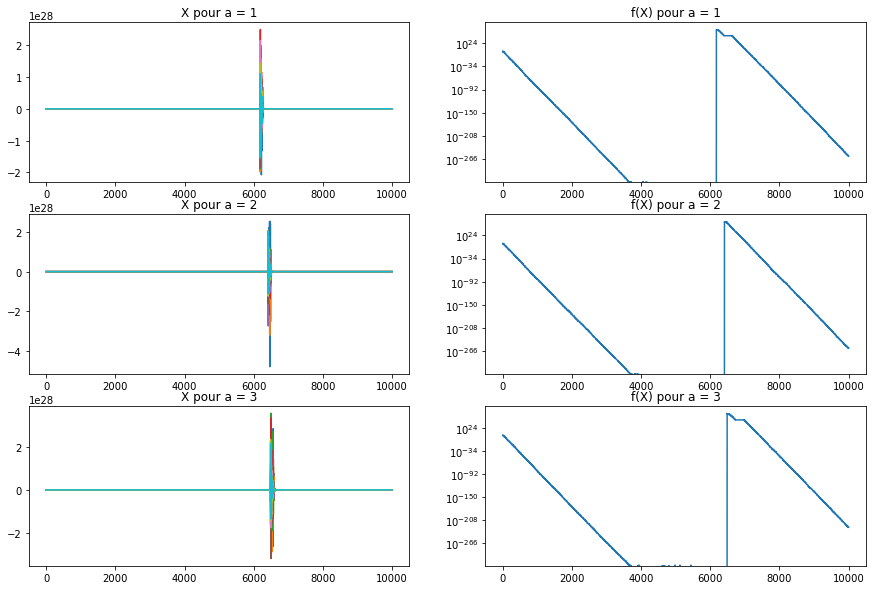

### Descente de gradient avec direction Newtonienne

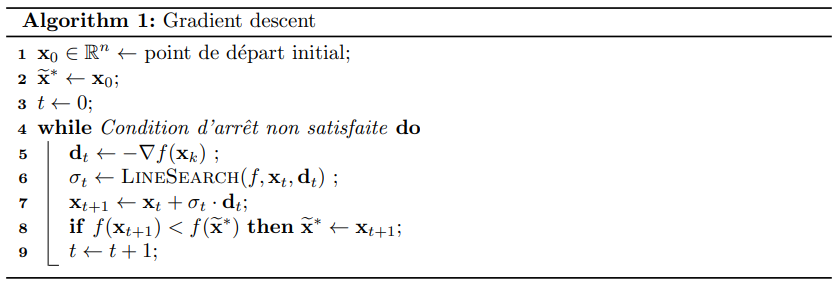

La descente de gradient avec direction Newtonienne va changer l'implémentation du vecteur $\sigma_t.d_t$. <br>
On va, à la place, calculer un vecteur h qui provient de la division du gradient par le gradient second. <br>
$-\sigma.\nabla f_4^{\alpha} (x_t) \rightarrow -\frac {\nabla f_4^{\alpha} (x_t)} {\nabla^2 f_4^{\alpha} (x_t)}$

Pour les fonctions 1 et 2, le calcul est vite fait : <br>

$$\frac {\nabla f_1^{\alpha} (X)} {\nabla^2 f_1^{\alpha} (X)}  =\begin{bmatrix} 2\alpha.x_1 \\ \vdots \\ 2\alpha.x_n \end{bmatrix} / \begin{bmatrix} 2\alpha \\ \vdots \\ 2\alpha\end{bmatrix} = \begin{bmatrix} x_1 \\ \vdots \\ x_n \end{bmatrix}$$

$$\frac {\nabla f_2^{\alpha} (X)} {\nabla^2 f_2^{\alpha} (X)}  = \begin{bmatrix} 10^{\alpha. \frac {1-1} {n-1}} x_1 \\ \vdots \\ 10^{\alpha. \frac {n-1} {n-1}} x_n \end{bmatrix} / \begin{bmatrix} 10^{\alpha. \frac {1-1} {n-1}} \\ \vdots \\ 10^{\alpha. \frac {n-1} {n-1}} \end{bmatrix} = \begin{bmatrix} x_1 \\ \vdots \\ x_n \end{bmatrix}$$

Pour ces deux fonctions, peu importe $\alpha$, on arrive au résultat optimal en 1 itération car on fait $x_{t+1} = x_t - \frac {\nabla f^{\alpha} (x_t)} {\nabla^2 f^{\alpha} (x_t)}$ = $x_t - x_t$ = 0

Nb itérations : 1 pour $\alpha$ = -3<br>
Nb itérations : 1 pour $\alpha$ = -1<br>
Nb itérations : 1 pour $\alpha$ = 1<br>
Nb itérations : 1 pour $\alpha$ = 3<br>

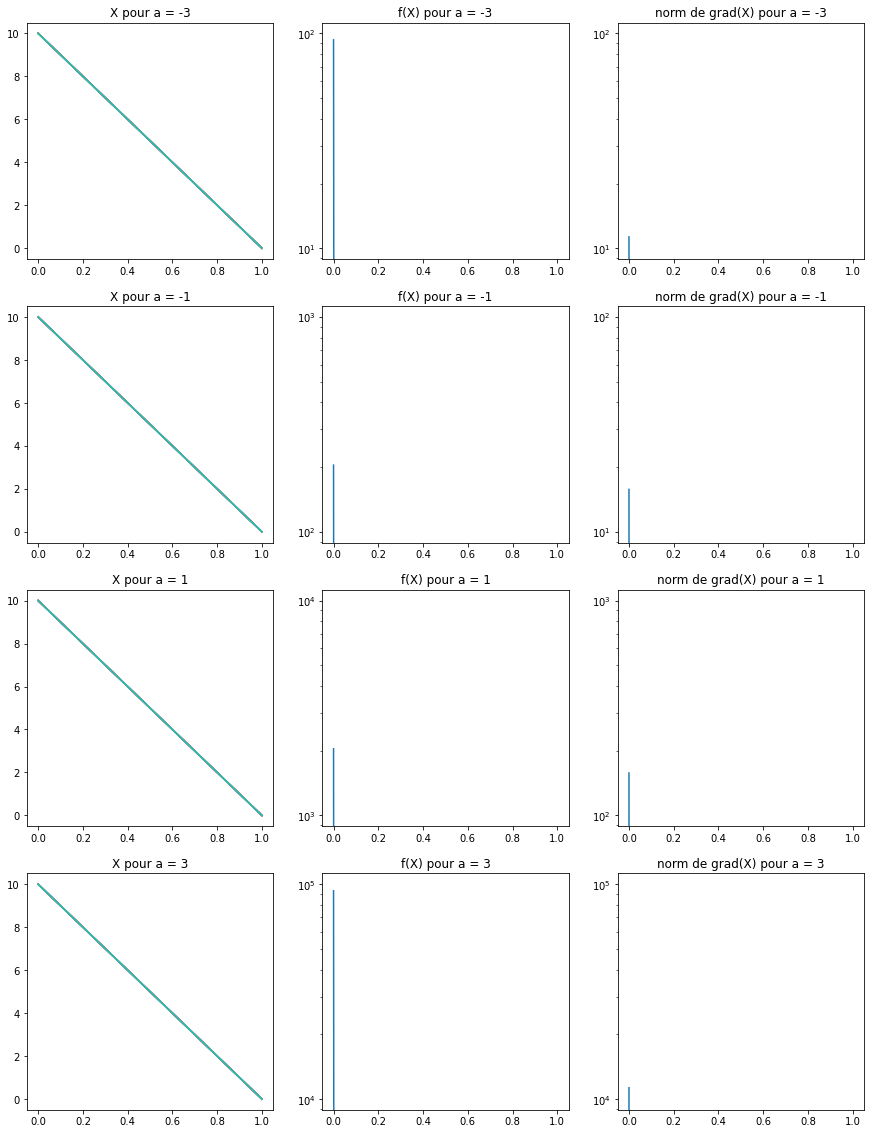

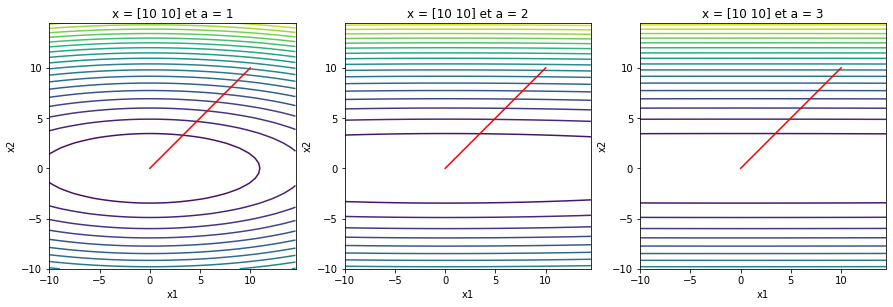

Pour la fonction $f_3^\alpha$, on a pas beaucoup plus de succés qu'avec les algorithmes précédents. On arrive simplement à trouver un minimum local lorsque le $\alpha$ est suffisamment petit.<br>
Si la descente de gradient ne fonctionne pas, c'est que la dérivée d'un cosinus donne un sinus et inversement. <br>
On ne peut donc pas obtinir une direction fiable. Elle sera extrêment dépendante de tous ses paramètres.

Nb itérations : 4 pour $\alpha$ = 0.1<br>
Nb itérations : 6 pour $\alpha$ = 0.5<br>
Nb itérations : 242 pour $\alpha$ = 0.75<br>
Nb itérations : 10000 pour $\alpha$ = 1<br>
Nb itérations : 10000 pour $\alpha$ = 2<br>

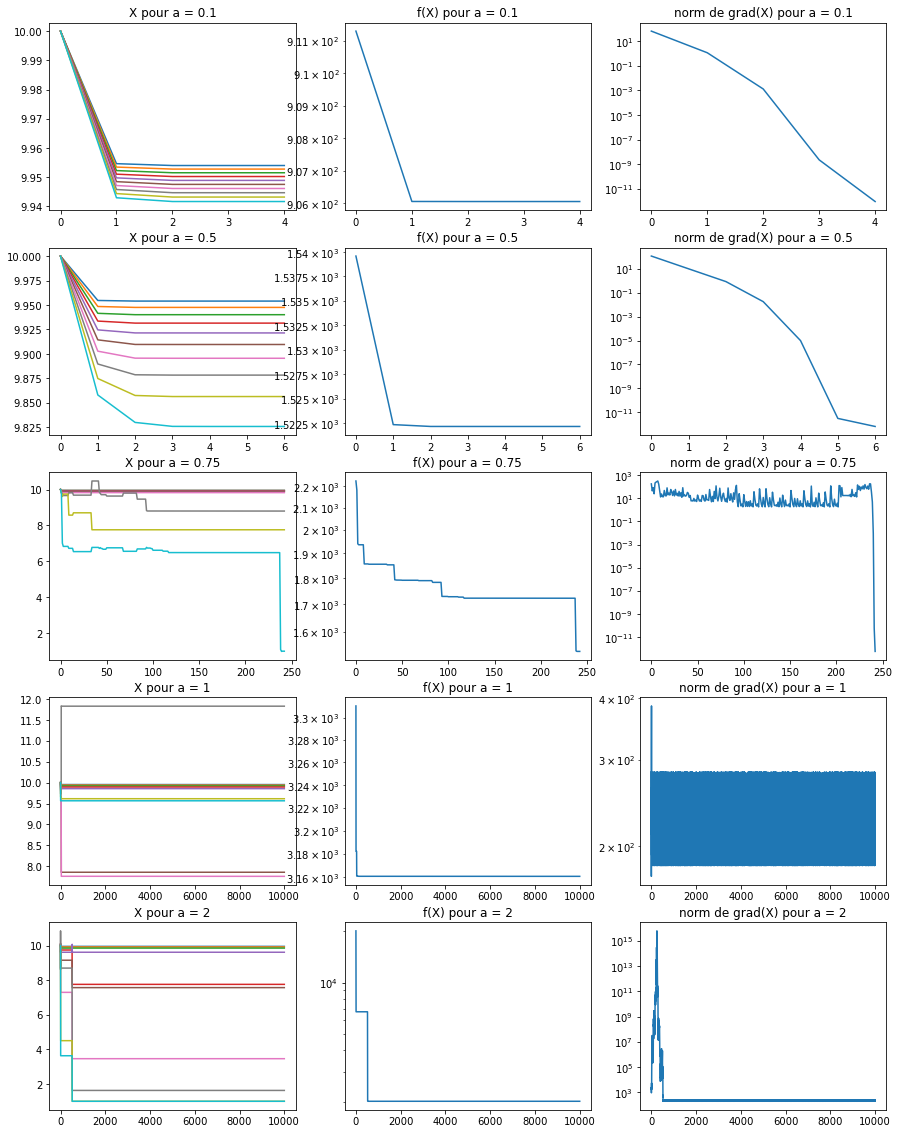

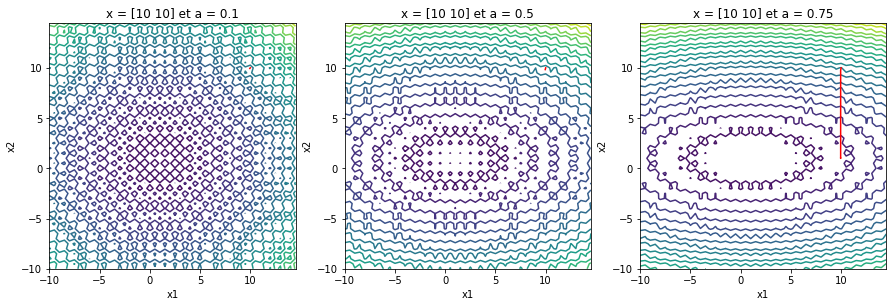

Pour la fonction $f_4^\alpha$, on arrive à obtenir un résulat uniquement lorsque $\alpha$ est négatif et suffisamment grand.<br>

Nb itérations : 10000  pour $\alpha$ = 0.25<br>
Nb itérations : 10000  pour $\alpha$ = 0.5<br>
Nb itérations : 10000  pour $\alpha$ = 0.75<br>
Nb itérations : 10000 pour $\alpha$ = -1<br>
Nb itérations : 23 pour $\alpha$ = -2<br>
Nb itérations : 12 pour $\alpha$ = -3<br>

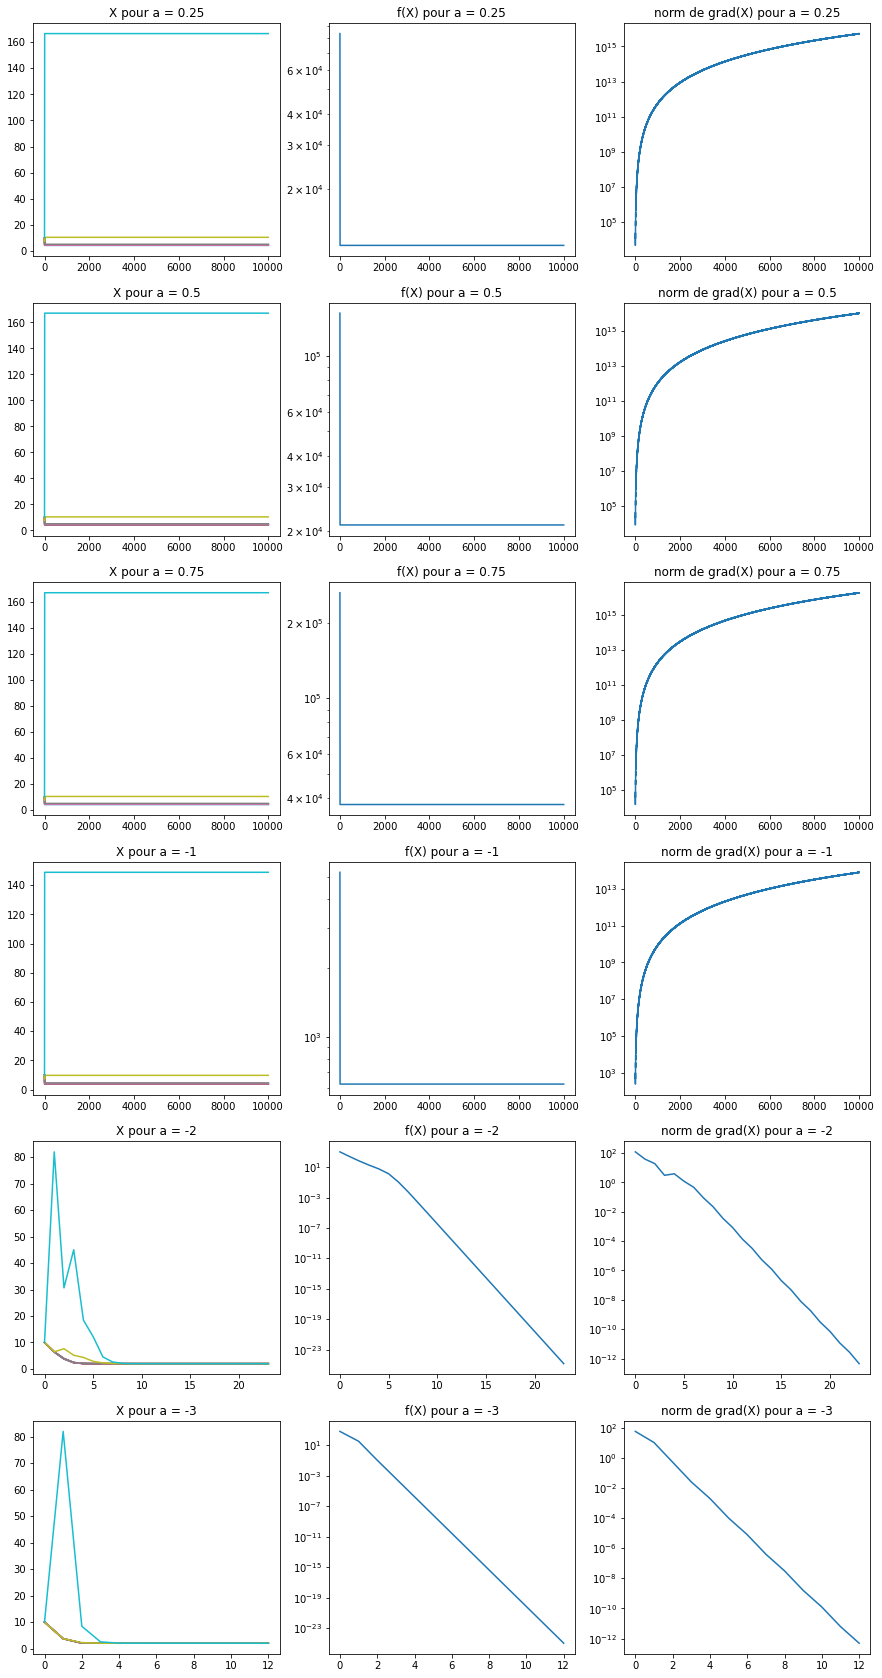

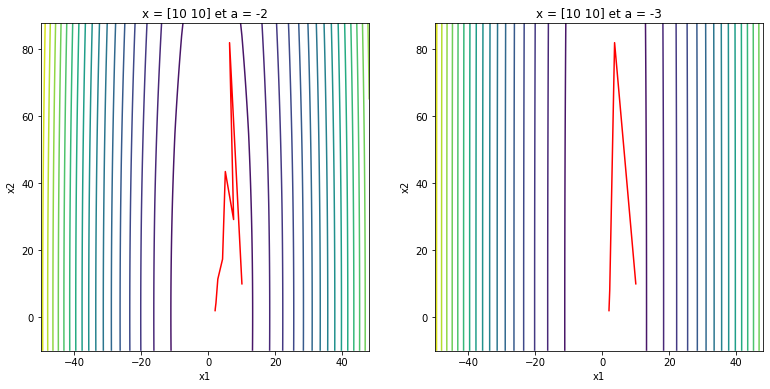

En conclusion, c'est un algorithme extrêmement efficace en ce qui concerne les deux premières fonctions car elles ne créent pas de minimum locaux, contrairement à la fonction 3. <br> Celle-ci, à cause de son cosinus, crée un changement de direction du gradient avec de minimes changements de positions. <br> Il est donc impossible de réaliser une descente de gradient sur cette fonction.

### Comparaison avec différents algorithmes de scipy.optimize

| Résultat fonction | Nelder-Mead | Powell | CG | BFGS | L-BFGS-B | TNC | COBYLA | SLSQP | trust-constr | mon Algo2 | mon Newton |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| $f_1^{0.5}$ | 1.46e-08 | 7.52e-27 | 1.84e-13 | 5.95e-12 | 1.26e-16 | 1.25e-16 | 9.08e-09 | 0.0 | 4.41e-21 | 7.69e-26 | 0.0 |
| $f_2^{0.5}$ | 1.81e-07 | 6.86e-25 | 5.38e-16 | 4.12e-13 | 7.78e-11 | 1.39e-10 | 1.53e-08 | 6.31e-07 | 6.85e-18 | 3.22e-25 | 0.0 |
| $f_3^{0.5}$ | 1522.19 | 69.65 | 1522.19 | 1522.19 | 1522.19 | 1523.07 | 1522.19 | 125.76 | 1522.19 | 1030.91 | 1522.19 |
| $f_4^{0.5}$ | 62.90 | 1.21e-21 | 5.25e-11 | 1.58e-13 | 7.71e-12 | 3.50e-07 | 3.55 | 6.59e-08 | 3.33e-13 | 5.094296804825419 | 21176.67 |

Pour la fonction $f_1^\alpha$, les algorithmes Newton et SLSQP sont ex aequo avec un résultat de minimisation parfait. <br>
Tous les algorithmes minimisent bien cette fonction. <br><br>
Pour la fonction $f_2^\alpha$, c'est l'algorithme Newton qui est le meilleur avec un résultat parfait. <br>
On constate, cette fois ci, non seulement, que SLSQP n'a pas un résultat aussi bon que Newton mais c'est le plus mauvais de la liste. <br>
Tous les algorithmes minimisent bien cette fonction. <br><br>
Pour la fonction $f_3^\alpha$,c'est l'algorithme Powell qui obtient le meilleur résultat.<br>
La plupart des algorithmes, dont Newton, sont aller se coincer dans le même minimum local.<br>
Algo2 obtient un meilleur résultat que Newton mais est largement devancé par SLSQP <br><br>
Pour la fonction $f_4^\alpha$, c'est l'algorithme  Powell qui obtient, encore une fois, le meilleur résultat. <br>
Newton semble vraiment être le seul qui n'arrive pas à minimiser la fonction. Il s'agit donc très probablement d'une erreur de notre par lors du calcul de $\nabla^2 f_4^\alpha(X)$.

Powell semble être le meilleur algorithme pour une fonction quelconque. <br>
Pour $f_3^2$, on obtient 21.61 qui est le meilleur résulat parmis les algorithmes ci-dessus.<br>
Pour $f_4^2$, il en va de même. On obtient 1.59e-20

En conclusion, les algorithmes de descente de gradient (Newton ou step size Armijo) sont des algorithmes qui peuvent être très efficaces mais qui ne sont pas adaptés à tous les types de fonctions. <br>
L'algorithme Powell, en particulier semble être très efficace sur différents types de fonctions et SLSQP n'est pas en reste. <br>
BFGS est un algorithme de descente de gradient qui utilise le gradient du step suivant dans ses calculs du pas. Il s'agit donc d'une approche différente de la descente de gradient qui peut fournir de meilleurs résultats que Newton. <br>
Exemple : $f_3^2$ BFGS renvoie 580.63 alors que Newton renvoie 2008.23.